In [54]:
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

from azure.quantum import Workspace 
from azure.quantum.qiskit import AzureQuantumProvider

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.shor_code_circuit import ShorCodeCircuit
from functions import *


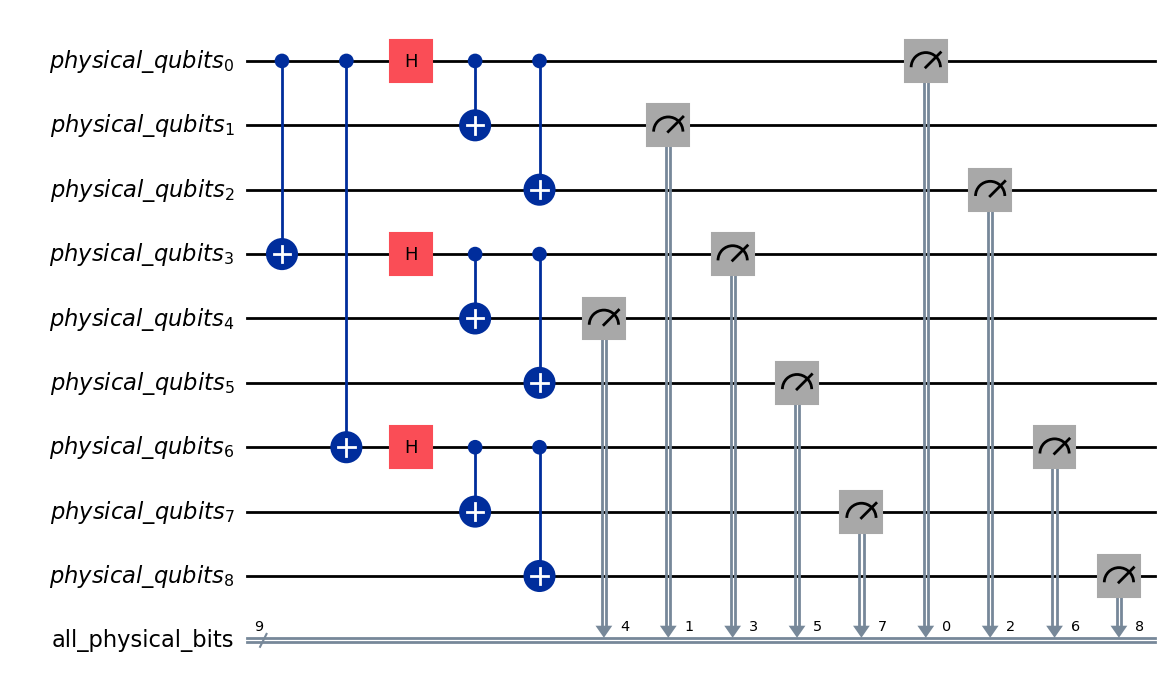

In [55]:
def load_circuit():
    qc = ShorCodeCircuit(1)

    qc.encode()
    
    qc.measure_all(basis='all')

    return qc

qc = load_circuit()
qc.draw_physical_circuit('mpl')

In [56]:
# IonQ access
workspace = Workspace(  
    resource_id = "", # Add the resourceID of your workspace
    location = "" # Add the location of your workspace (for example "westus")
    )

provider = AzureQuantumProvider(workspace)

In [57]:
backend_name = "ionq.qpu.aria-1"
backend_name_simulator = "ionq.simulator"
backend = provider.get_backend(backend_name)
simulator_backend = provider.get_backend(backend_name_simulator)

option_params = {
    "error-mitigation": {
        "debias": False,
        "sharpen": False
    }
}

backend.options.update_options(**option_params)
simulator_backend.options.update_options(**option_params)
simulator_backend.options.update_options(noise_model="aria-1") 


In [58]:

phy_qc = qc.physical_quantum_circuit
isa_circuit = transpile(phy_qc, backend, optimization_level=3)
print(f"Circuit Depth: {isa_circuit.depth()}")


Circuit Depth: 6


In [59]:
simulation_result = sampler_simulation(qc.physical_quantum_circuit, 12800)

print(f"{simulation_result.data[qc.physical_bit_register.name].get_counts()}")
        


{'111111111': 1621, '111000111': 1637, '000000111': 1546, '000111111': 1570, '000000000': 1583, '111000000': 1644, '000111000': 1615, '111111000': 1584}


Run experiment

In [60]:
shots = 10000
# job = backend.run(isa_circuit, shots=shots)
# job = simulator_backend.run(isa_circuit, shots=shots) # simulador
# job_id = job.id()
# pub_result = job.result()

In [90]:
results = extract_results_json_IONQ('shor_code_T1_all_meas.json', type='percentage', reverse_order=True)

results = results[0]
print(results)

{'000000000': 11.054370681886452, '000000001': 0.11014318614198458, '000000010': 0.19024732151797336, '000000011': 0.040052067687994394, '000000100': 0.07009111845399019, '000000101': 0.27035145689396217, '000000110': 0.08010413537598879, '000000111': 11.114448783418444, '000001000': 0.28036447381596075, '000001001': 0.0, '000001010': 0.010013016921998599, '000001011': 0.010013016921998599, '000001100': 0.0, '000001101': 0.020026033843997197, '000001110': 0.0, '000001111': 0.25032542304996497, '000010000': 0.15019525382997898, '000010001': 0.0, '000010010': 0.0, '000010011': 0.0, '000010100': 0.0, '000010101': 0.010013016921998599, '000010110': 0.010013016921998599, '000010111': 0.20026033843997196, '000011000': 0.11014318614198458, '000011001': 0.0, '000011010': 0.0, '000011011': 0.0, '000011100': 0.0, '000011101': 0.0, '000011110': 0.0, '000011111': 0.11014318614198458, '000100000': 0.05006508460999299, '000100001': 0.0, '000100010': 0.0, '000100011': 0.0, '000100100': 0.0, '00010010

In [91]:
states = [bin(i)[2:].zfill(9) for i in range(2**9)]
valid_states = ['000000111', '111000111', '111000000', '111111000', '000111111', '111111111', '000000000', '000111000']

TVD

In [92]:
alpha = generate_uniform_distribution(9, valid_states)


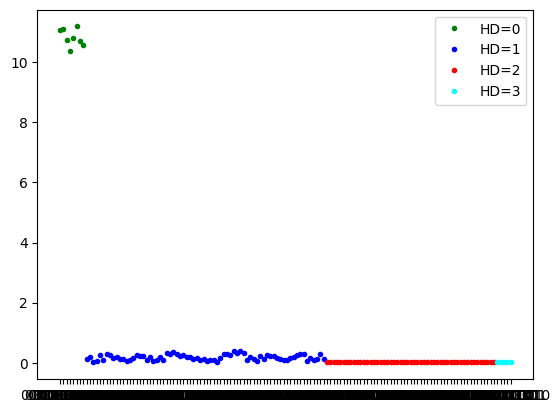

In [93]:
plot_results_hamming_distance(results, qb_len=9, valid_states=valid_states, omit_zeros=True)
# ommiting states with zero counts

In [94]:
tvd = calculate_tvd(results, alpha, percentage=True)
print(f"best TVD: {round(tvd*100,2)}%")

best TVD: 13.45%


In [ ]:
print(*[f"{s}, {round(results[s],3)}, {hamming_distance(s, valid_states)}" for s in states
         if results[s] > 0.3 and hamming_distance(s, valid_states) > 0
         ], sep='\n')

# observar error en el 3er qubit:

001000000, 0.32, 1
001000111, 0.3, 1
001111000, 0.36, 1
001111111, 0.3, 1
101111000, 0.3, 1
110000000, 0.38, 1
110000111, 0.33, 1
110111000, 0.391, 1
110111111, 0.31, 1


In [96]:
# ordenar states por #counts
print(*[f"{s}, {round(results[s],3)}, {hamming_distance(s, valid_states)}" for s in
        sorted(results.keys(), key=lambda x: results[x], reverse=True)
         if results[s] > 0 and hamming_distance(s, valid_states) >= 0
         ], sep='\n')

111000111, 11.185, 0
000000111, 11.114, 0
000000000, 11.054, 0
111000000, 10.804, 0
000111000, 10.734, 0
111111000, 10.714, 0
111111111, 10.574, 0
000111111, 10.373, 0
110111000, 0.391, 1
110000000, 0.38, 1
001111000, 0.36, 1
110000111, 0.33, 1
001000000, 0.32, 1
110111111, 0.31, 1
001000111, 0.3, 1
001111111, 0.3, 1
101111000, 0.3, 1
000001000, 0.28, 1
101000111, 0.28, 1
111110000, 0.28, 1
111110111, 0.28, 1
111111101, 0.28, 1
000000101, 0.27, 1
010000111, 0.27, 1
000101111, 0.26, 1
111101111, 0.26, 1
000001111, 0.25, 1
101111111, 0.25, 1
111001000, 0.25, 1
000110000, 0.23, 1
000110111, 0.23, 1
111001111, 0.23, 1
111010000, 0.22, 1
010000000, 0.21, 1
111000101, 0.21, 1
000010111, 0.2, 1
000000010, 0.19, 1
000111010, 0.19, 1
010111000, 0.19, 1
010111111, 0.19, 1
111101000, 0.19, 1
000111101, 0.18, 1
111000010, 0.18, 1
101000000, 0.17, 1
011000111, 0.16, 1
111010111, 0.16, 1
111100111, 0.16, 1
111111010, 0.16, 1
000010000, 0.15, 1
000101000, 0.15, 1
111000110, 0.13, 1
111111110, 0.13, 1

Probando correccion post-measurement

In [103]:
# flip the 7th qubit (only in non-valid states)

corrected_results_q3 = {}
for s in states:
    corrected_results_q3[s] = 0


for s in states:
    if hamming_distance(s, valid_states) == 0:
        corrected_results_q3[s] += results[s]
    else:
        s_corrected = s
        s_corrected = ''.join([s_corrected[i] if i != 2 else str(1-int(s_corrected[i])) for i in range(9)])
        corrected_results_q3[s_corrected] += results[s]

In [104]:
tvd = calculate_tvd(corrected_results_q3, alpha, percentage=True)
print(f"'corrected' TVD: {round(tvd*100,2)}%")

'corrected' TVD: 10.75%


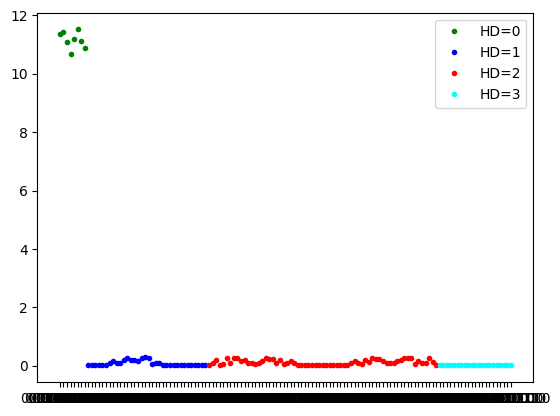

In [105]:
plot_results_hamming_distance(corrected_results_q3, qb_len=9, valid_states=valid_states, omit_zeros=True)